# Exercise 3

## Task 1

In [1]:
import os

dataset_path = os.path.join(os.curdir, 'data', 'CombinedCyclePowerPlantDirty.csv')

assert os.path.exists(dataset_path)

In [ ]:
import pandas as pd

df = pd.read_csv(dataset_path)

df.head()

### a)

In [3]:
df.dtypes

AT      object
V      float64
AP     float64
RH     float64
PE      object
TCN     object
dtype: object

### b)

/home/bruno/miniconda3/envs/AIDAE/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/bruno/miniconda3/envs/AIDAE/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/bruno/miniconda3/envs/AIDAE/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/bruno/miniconda3/envs/AIDAE/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


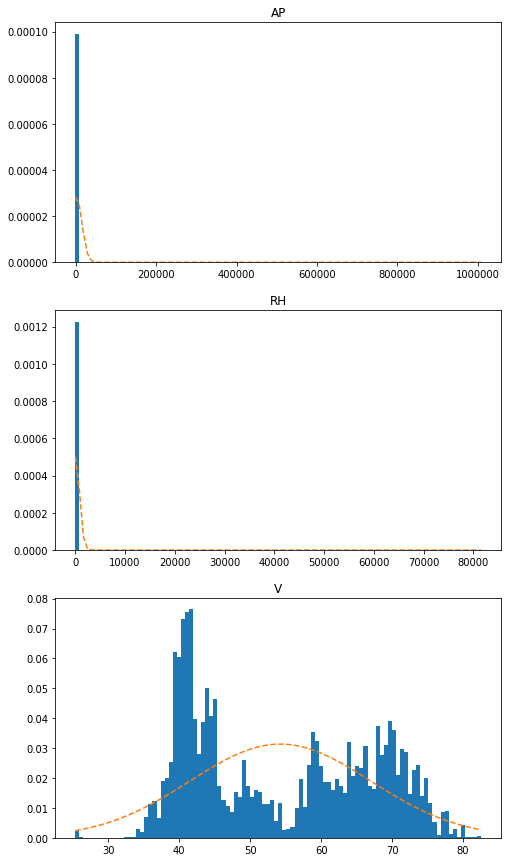

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def get_hist(srs, n_bins=10, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    n, bins, patches = ax.hist(srs, n_bins, density=1)

    # add a 'best fit' gaussian distribution
    sigma = srs.std()
    mu = srs.mean()
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--')
    
    return ax

fig, axes = plt.subplots(3,1)
fig.set_size_inches(8, 15)

for ax, col in zip(axes, df[['AP', 'RH', 'V']]):
    ax = get_hist(df[col], n_bins=100, ax=ax)
    ax.set_title(col)

plt.show()

We can see that `AP` and `RH` seem to have some gross outliers. `V` doesn't follow a pattern apparently, perhaps it is made of two gaussian distributions centered at around 40 and 70.

### c)

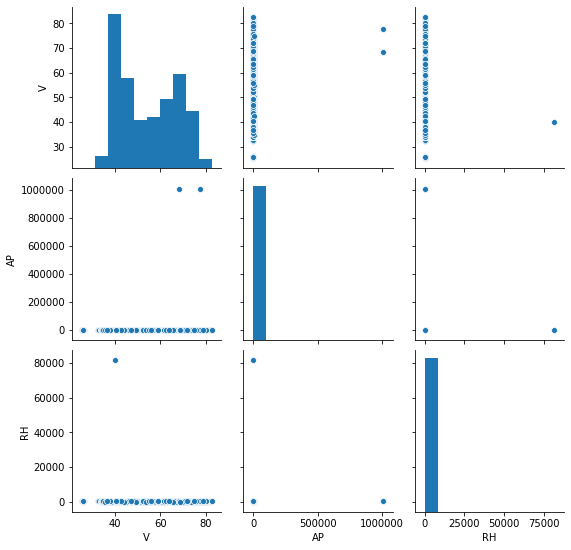

In [7]:
import seaborn as sns

sns.pairplot(df)

That we indeed have some gross outliers.

## Task 2

### a)

In [8]:
df.describe()

,V,AP,RH
count,10524.000000,1.052200e+04,10518.000000
mean,54.252278,1.204653e+03,81.032911
std,12.725583,1.388636e+04,794.587071
min,25.360000,-1.007220e+03,25.560000
25%,41.760000,1.008710e+03,63.210760
50%,52.050000,1.012970e+03,74.910000
75%,66.510000,1.017710e+03,84.837500
max,82.558486,1.008500e+06,81550.000000


In [10]:
df = df.dropna()
df.describe()

,V,AP,RH
count,10514.000000,1.051400e+04,10514.000000
mean,54.252565,1.204799e+03,81.034013
std,12.726523,1.389164e+04,794.738207
min,25.360000,-1.007220e+03,25.560000
25%,41.760000,1.008710e+03,63.210000
50%,52.050000,1.012970e+03,74.905000
75%,66.510000,1.017707e+03,84.837500
max,82.558486,1.008500e+06,81550.000000


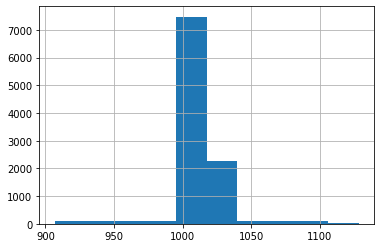

In [16]:
df['AP'][(df['AP'] < 800000) & (df['AP'] > 0)].hist()

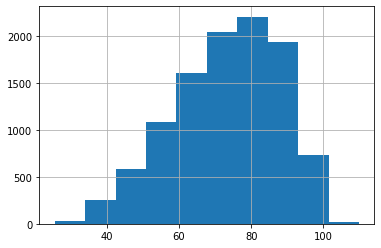

In [18]:
df['RH'][df['RH'] < 70000].hist()

In [19]:
df = df[(df['AP'] < 800000) & \
        (df['AP'] > 0) & \
        (df['RH'] < 70000)]

df.describe()

,V,AP,RH
count,10510.000000,10510.000000,10510.000000
mean,54.249742,1013.387179,73.285055
std,12.725278,18.945721,14.728071
min,25.360000,906.715312,25.560000
25%,41.760000,1008.710000,63.210000
50%,52.050000,1012.970000,74.905000
75%,66.510000,1017.700000,84.837500
max,82.558486,1128.590084,109.861441


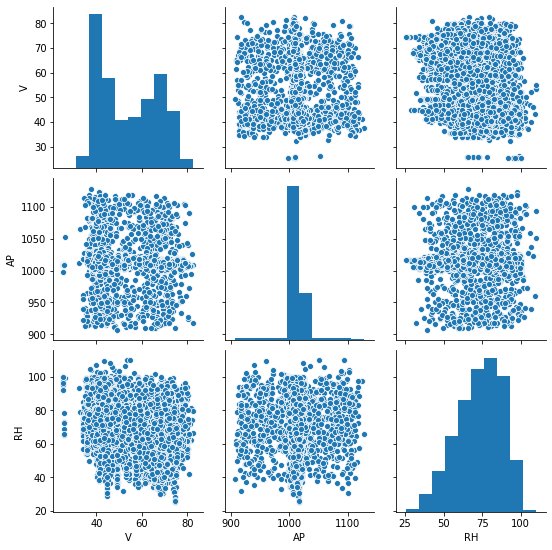

In [20]:
sns.pairplot(df)

### b)

In [32]:
df['PE'] = pd.to_numeric(df['PE'], errors='coerce')
df = df.dropna()

df.describe()

,V,AP,RH,PE
count,9555.000000,9555.000000,9555.000000,9555.000000
mean,54.301646,1013.258749,73.303540,548.615366
std,12.707664,5.939795,14.604068,6521.889414
min,25.360000,992.890000,25.560000,-466.720000
25%,41.740000,1009.100000,63.320000,439.750000
50%,52.080000,1012.940000,74.960000,451.620000
75%,66.540000,1017.260000,84.830000,468.455000
max,81.560000,1033.300000,100.160000,460440.000000


Looking for outliers.

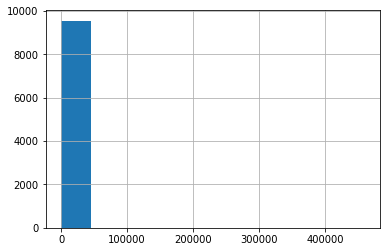

In [33]:
df['PE'].hist()

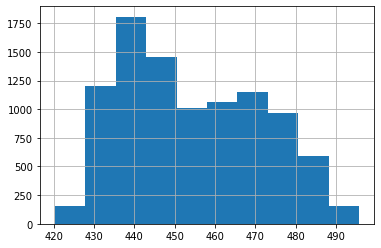

In [35]:
df['PE'][(df['PE'] < 400000) & (df['PE'] > 0)].hist()

In [36]:
df = df[(df['PE'] < 400000) & (df['PE'] > 0)]

df.describe()

,V,AP,RH,PE
count,9552.000000,9552.000000,9552.000000,9552.000000
mean,54.303454,1013.257897,73.302192,454.370450
std,12.708311,5.940015,14.605955,17.071981
min,25.360000,992.890000,25.560000,420.260000
25%,41.740000,1009.100000,63.317500,439.750000
50%,52.080000,1012.940000,74.965000,451.605000
75%,66.540000,1017.260000,84.832500,468.450000
max,81.560000,1033.300000,100.160000,495.760000


### c)

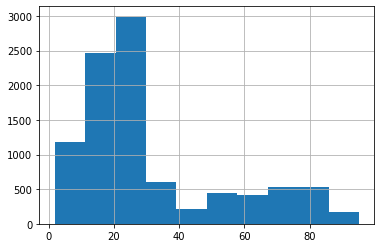

In [41]:
df['AT'] = pd.to_numeric(df['AT'].str.replace('o', '0'))

df['AT'].hist()

## Task 3

### a)

Text(0, 0.5, 'PE')

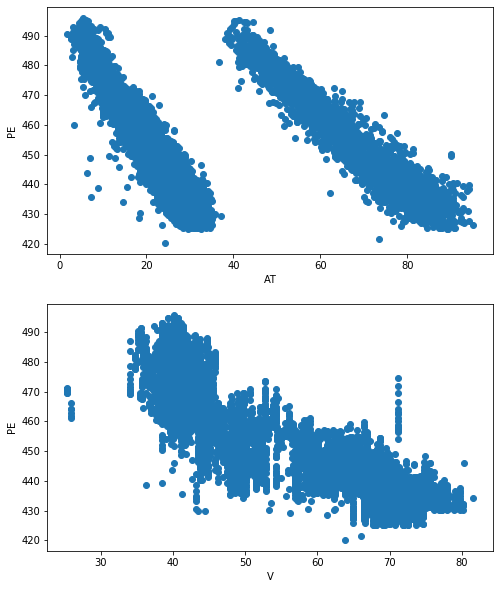

In [42]:
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(8, 10)

axes[0].scatter(df['AT'], df['PE'])
axes[0].set_xlabel('AT')
axes[0].set_ylabel('PE')

axes[1].scatter(df['V'], df['PE'])
axes[1].set_xlabel('V')
axes[1].set_ylabel('PE')

We can see that there is an invert correlation between `AT` and `PE` in the two regions, while the correlation between `V` and `PE` is noisy. 

### b)

In [55]:
technicians = df['TCN'].unique()

dfs = dict()
for tcn in technicians:
    dfs[tcn] = df[df['TCN'] == tcn]
    dfs[tcn].name = tcn
    
dfs.keys()

dict_keys(['Marc Wolf', 'Christopher Clapman', 'Antoin Tessier', 'Daniel Smithson'])

In [56]:
dfs['Marc Wolf'].describe()

,AT,V,AP,RH,PE
count,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000
mean,19.601051,54.355480,1013.428601,73.382936,454.354488
std,7.514367,12.791207,5.945199,14.571788,17.162311
min,2.340000,25.880000,993.820000,25.560000,425.110000
25%,13.405000,41.620000,1009.210000,63.750000,439.640000
50%,20.420000,51.430000,1013.030000,74.640000,451.300000
75%,25.700000,66.540000,1017.350000,84.880000,468.490000
max,37.110000,80.250000,1033.140000,100.130000,495.760000


In [59]:
axes.flatten()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bf53453d0>,
      dtype=object)

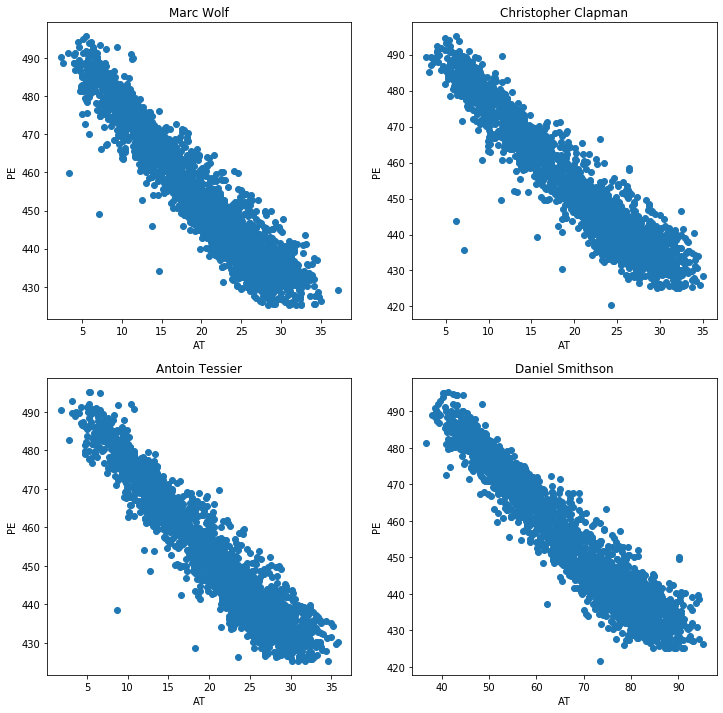

In [60]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(12,12)

for ax, tcn in zip(axes.flatten(), technicians):
    ax.scatter(dfs[tcn]['AT'], dfs[tcn]['PE'])
    ax.set_xlabel('AT')
    ax.set_ylabel('PE')
    ax.set_title(tcn)

plt.show()

It shows that Daniel Smithson was probably recording the ambient temperature in Fahrenheit instead of Celsius, as it has the same behavior as the others but in a different range.

### c)

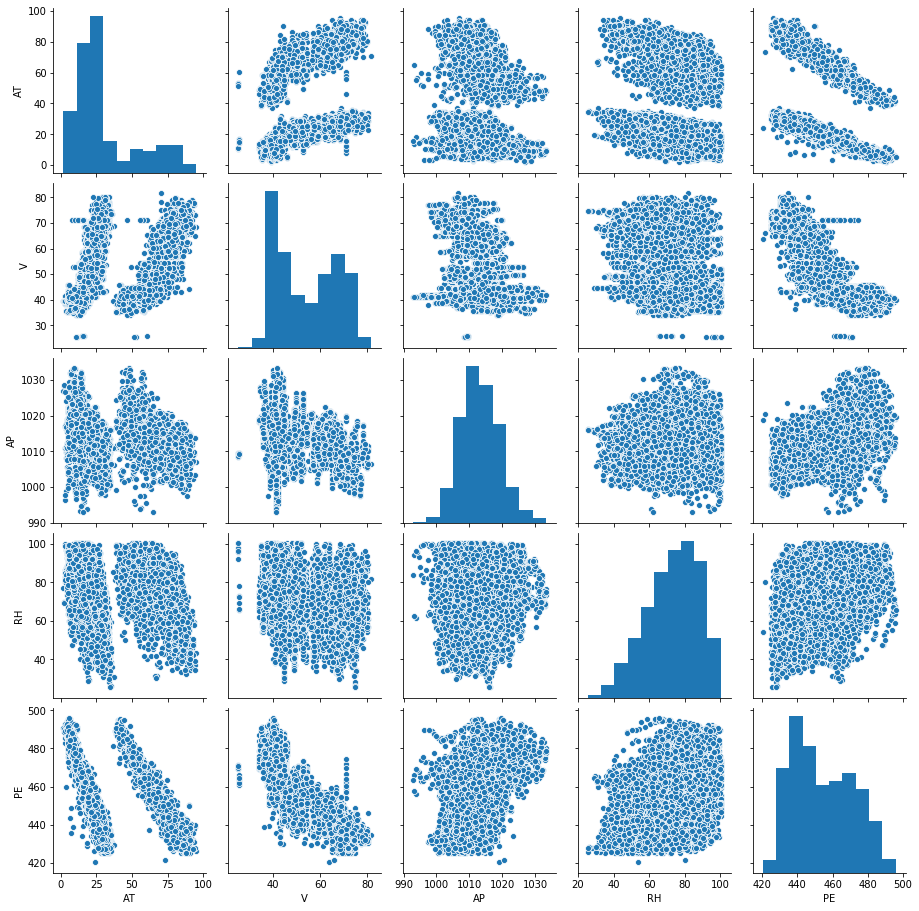

In [61]:
sns.pairplot(df)

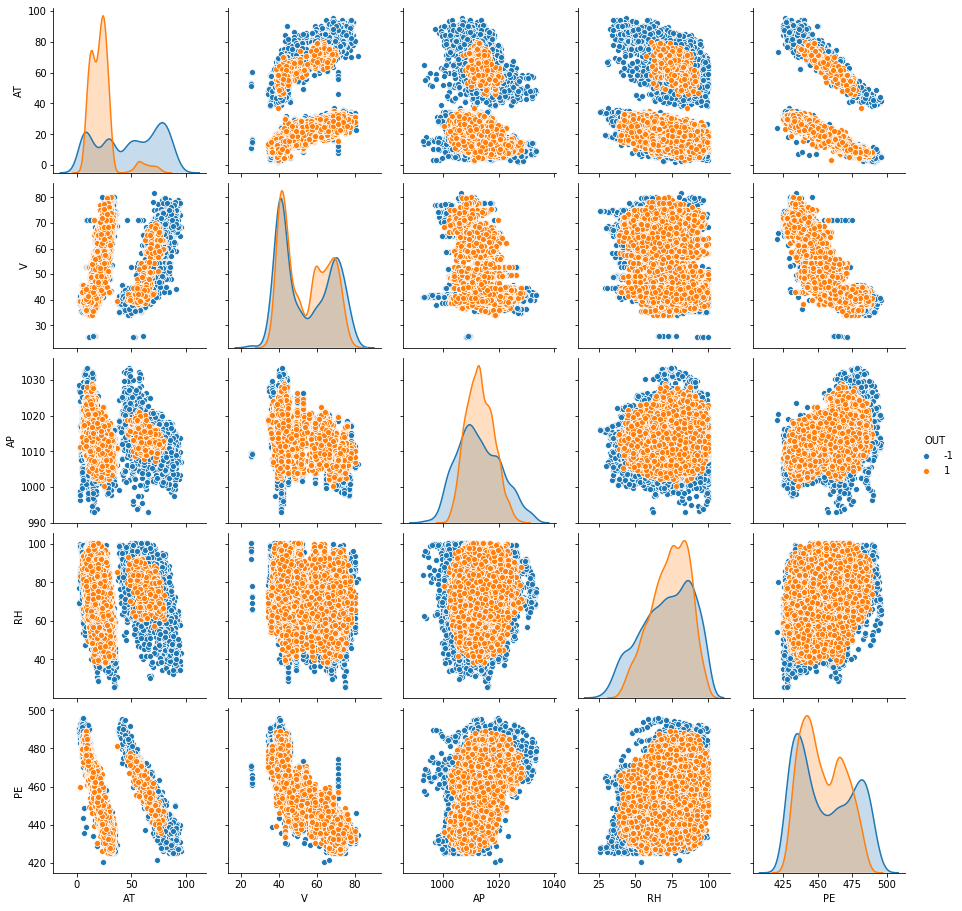

In [69]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest()
outliers = isf.fit_predict(df.drop(columns=['TCN']))
outliers = pd.Series(outliers, index=df.index)
df['OUT'] = outliers

sns.pairplot(df, hue='OUT')

The algorithm was too aggressive in detecting the outliers, therefore they won't be removed.

## Task 4

### a)

In [80]:
df['TCN'] = df['TCN'].astype('category')
df['TCN'] = df['TCN'].cat.rename_categories(['A', 'B', 'C', 'D'])

df['TCN']

1        D
2        B
3        A
4        A
5        B
        ..
10518    B
10520    D
10521    D
10522    A
10523    D
Name: TCN, Length: 9552, dtype: category
Categories (4, object): [A, B, C, D]